In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

Exploratory Data Analysis (EDA)

In [6]:
# Descriptive analysis o numerical variable.
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [7]:
# Checking for null records
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Let's examine individual column as we cannot drop all null records here.
For example: In Credit history, we have 50 null records, also it is not necessary that all
customers applying for loan would have credit history. So, loan can be allocated to customers
without credit history as well, in that case we need to exmine other parameters hence those
record cannot be dropped.

In [8]:
# Count all records in credit_history
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

In [9]:
import seaborn as sns

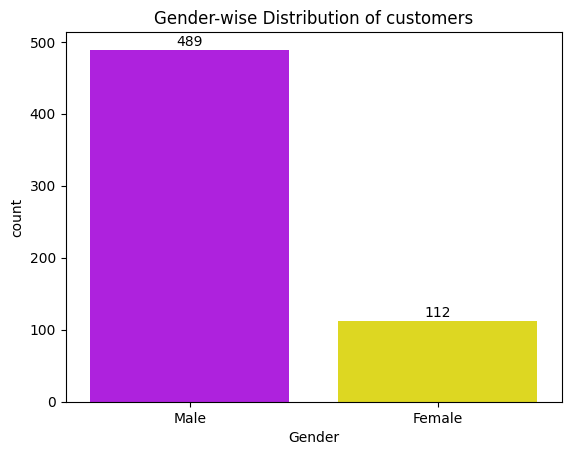

In [10]:
ax=sns.countplot(x="Gender",hue='Gender',data=df,legend=False,palette=['#be03fc','#fcf403'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

# Display the plot
plt.title("Gender-wise Distribution of customers")
plt.show()

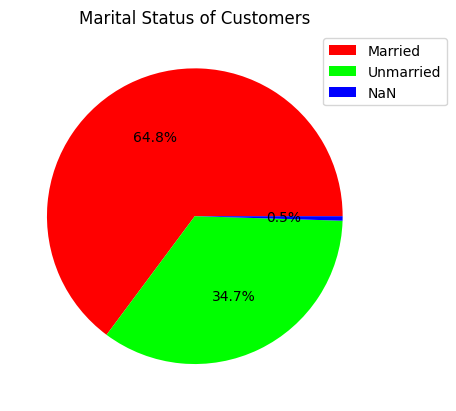

In [11]:
# Mariial Status distribution
ms=df.Married.value_counts(dropna=False)
ms
plt.pie(ms,autopct='%1.1f%%',
        colors=sns.color_palette(["#FF0000", "#00FF00", "#0000FF"]))
plt.title("Marital Status of Customers")
plt.legend(labels=['Married','Unmarried','NaN'],loc='upper right',bbox_to_anchor=(1.2, 1))
plt.show()

In [12]:
df.info()
#plt.bar(df.dependents)
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


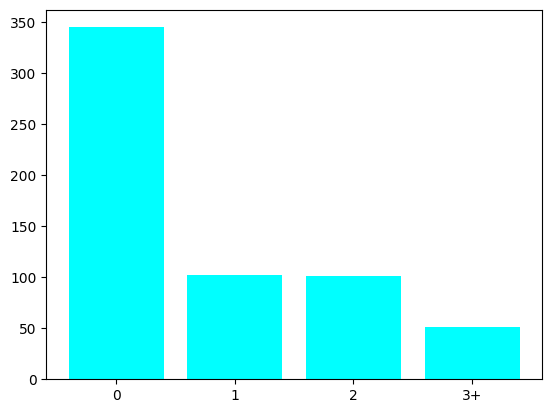

In [13]:
print(df.Dependents.value_counts())
plt.bar(df.Dependents.value_counts().index,
        df.Dependents.value_counts().values,
        color='cyan')
plt.show()

In [14]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

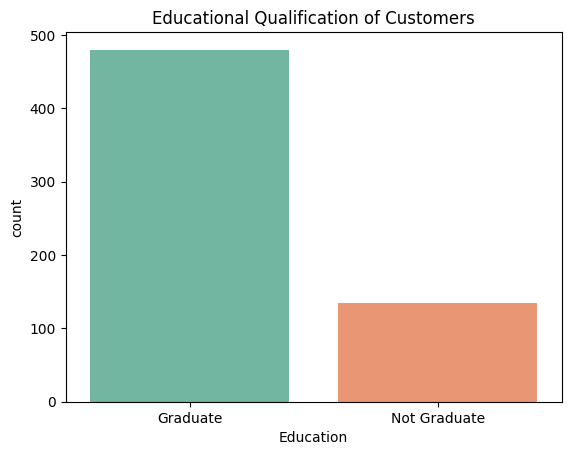

In [15]:
sns.countplot(x='Education',data=df,hue='Education',palette='Set2')
plt.title("Educational Qualification of Customers")
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


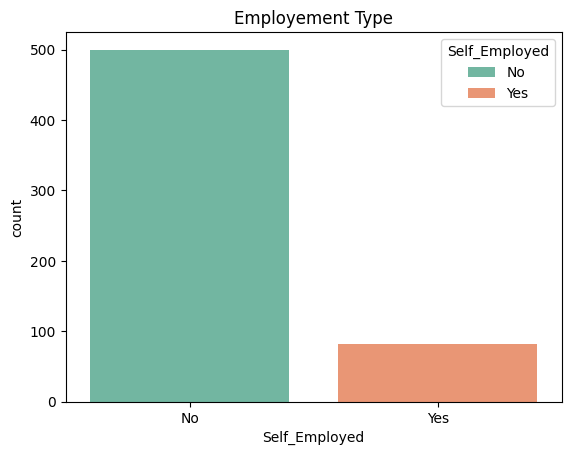

In [17]:
sns.countplot(x='Self_Employed',data=df,hue='Self_Employed',palette='Set2')
plt.title("Employement Type")
plt.show()

In [18]:
average_income=df.ApplicantIncome.mean()
print(f"The average income is {average_income:.2f}")
above_average=df[df["ApplicantIncome"]>average_income]
below_average=df[df["ApplicantIncome"]<average_income]
print(f"{len(above_average)} customers have higher salary than average")
print(f"{len(below_average)} customers have lower salary than average")


The average income is 5403.46
176 customers have higher salary than average
438 customers have lower salary than average


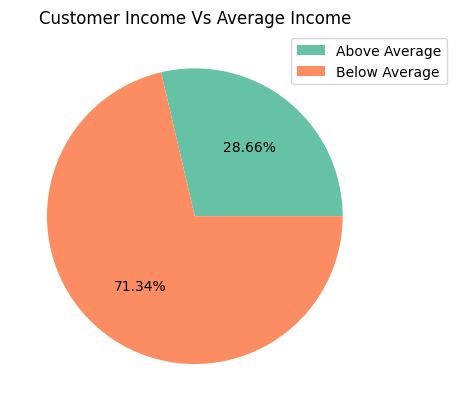

In [19]:
#Pie Chart to show percentage of customers having salary lower than average
colour=sns.color_palette('Set2')
plt.pie([len(above_average),len(below_average)],autopct='%1.2f%%',colors=colour)
plt.legend(['Above Average','Below Average'],loc='upper right',bbox_to_anchor=(1.2,1))
plt.title("Customer Income Vs Average Income")
plt.show()

In [20]:
area=list(df.Property_Area.value_counts().index)
prop=list(df.Property_Area.value_counts().values)
print(area,prop)

['Semiurban', 'Urban', 'Rural'] [np.int64(233), np.int64(202), np.int64(179)]


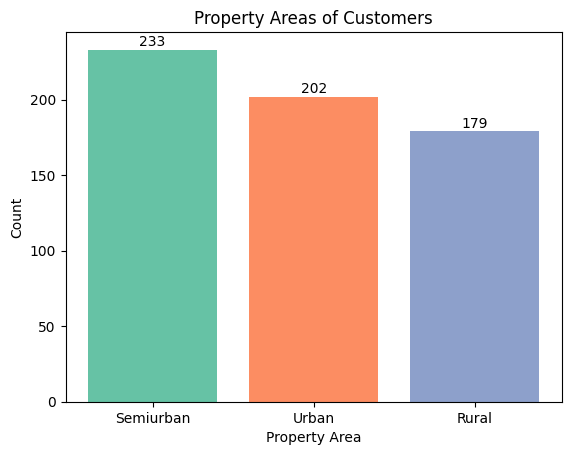

In [21]:
plt.bar(area,prop,color=sns.color_palette("Set2"))
for i, value in enumerate(prop):
    plt.text(i,value+0.5,str(value),ha='center',va='bottom')
plt.title("Property Areas of Customers")
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


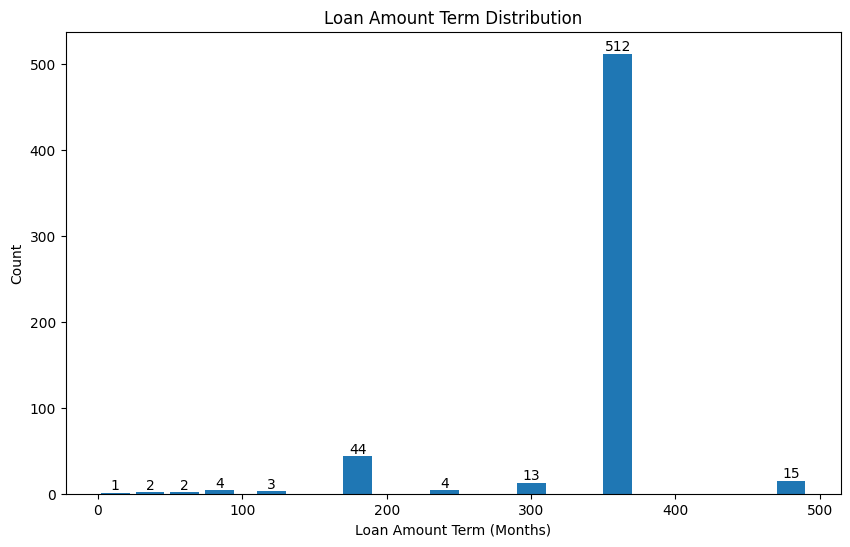

In [42]:
term = df.Loan_Amount_Term.value_counts()
months = list(term.index)
count_month = list(term.values)
print(term)
# Set figure size to increase bar size
plt.figure(figsize=(10,6)) 
bars=plt.bar(months, count_month,width=20)
plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Count')
plt.title('Loan Amount Term Distribution')
for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f'{height}',
             ha='center',va='bottom',fontsize=10)
plt.show()


In [23]:
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


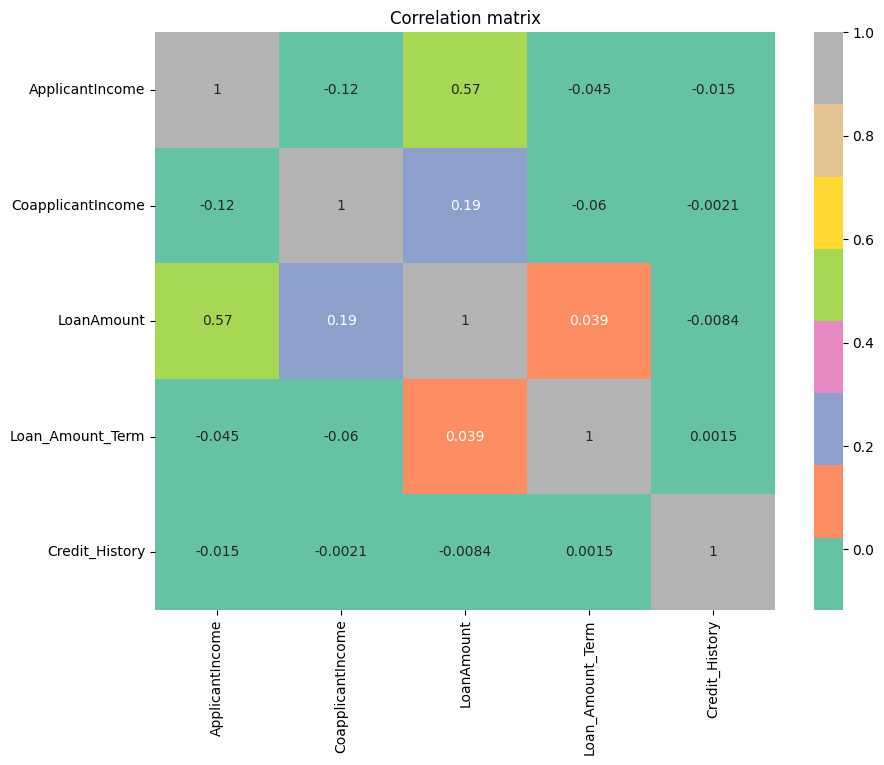

In [24]:
plt.figure(figsize=(10,7.5))
sns.heatmap(correlation_matrix,annot=True,cmap="Set2")
plt.title("Correlation matrix")
plt.show()

Loan Prediction model will be done on Decision Tree, Random Forest & Logistic Regression